In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv')


In [2]:
df


,Unnamed: 0,furnishing,bathrooms,facing,security_numeric,price_numeric,built_up_area_numeric_in_sq_ft,balcony_numeric,floor_number,total_floors,...,Intercom.1,Kids Area,Lift,Not Found.1,Parking,Pet Allowed,Pool,Power Backup,Sports Facility,Water Supply
0,0,Unfurnished,2,North-East,150000.0,74000,850,0,5,22,...,1,0,1,0,1,0,0,1,0,1
1,1,Unfurnished,1,South,100000.0,45000,367,1,10,16,...,1,1,1,0,0,1,0,1,0,1
2,2,Fully Furnished,2,East,300000.0,95000,804,0,2,49,...,1,1,1,0,0,1,1,1,1,1
3,3,Unfurnished,2,West,100000.0,48000,930,0,3,4,...,1,1,1,0,1,0,0,0,0,1
4,5,Unfurnished,2,East,500000.0,95000,1000,1,7,15,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,974,Unfurnished,2,North,200000.0,65000,850,0,11,18,...,0,0,0,0,1,0,0,0,0,0
939,975,Fully Furnished,1,East,100000.0,40000,650,0,1,4,...,0,0,0,1,0,0,0,0,0,0
940,976,Semi Furnished,2,South-East,160000.0,55000,600,0,3,7,...,0,0,0,0,1,0,0,0,0,0
941,977,Fully Furnished,2,East,100000.0,39000,650,0,3,3,...,0,1,0,0,1,0,0,0,1,1


In [3]:
df.dropna()

,Unnamed: 0,furnishing,bathrooms,facing,security_numeric,price_numeric,built_up_area_numeric_in_sq_ft,balcony_numeric,floor_number,total_floors,...,Intercom.1,Kids Area,Lift,Not Found.1,Parking,Pet Allowed,Pool,Power Backup,Sports Facility,Water Supply
0,0,Unfurnished,2,North-East,150000.0,74000,850,0,5,22,...,1,0,1,0,1,0,0,1,0,1
1,1,Unfurnished,1,South,100000.0,45000,367,1,10,16,...,1,1,1,0,0,1,0,1,0,1
2,2,Fully Furnished,2,East,300000.0,95000,804,0,2,49,...,1,1,1,0,0,1,1,1,1,1
3,3,Unfurnished,2,West,100000.0,48000,930,0,3,4,...,1,1,1,0,1,0,0,0,0,1
4,5,Unfurnished,2,East,500000.0,95000,1000,1,7,15,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,974,Unfurnished,2,North,200000.0,65000,850,0,11,18,...,0,0,0,0,1,0,0,0,0,0
939,975,Fully Furnished,1,East,100000.0,40000,650,0,1,4,...,0,0,0,1,0,0,0,0,0,0
940,976,Semi Furnished,2,South-East,160000.0,55000,600,0,3,7,...,0,0,0,0,1,0,0,0,0,0
941,977,Fully Furnished,2,East,100000.0,39000,650,0,3,3,...,0,1,0,0,1,0,0,0,1,1


In [4]:
print(df.isnull().sum())

Unnamed: 0                        0
furnishing                        0
bathrooms                         0
facing                            0
security_numeric                  0
price_numeric                     0
built_up_area_numeric_in_sq_ft    0
balcony_numeric                   0
floor_number                      0
total_floors                      0
age_numeric                       0
AC                                0
Bed                               0
CCTV                              0
Cupboard                          0
Fridge                            0
Geyser                            0
Intercom                          0
Microwave                         0
Not Found                         0
Sofa                              0
Stove                             0
TV                                0
Washing Machine                   0
+10                               0
+2                                0
+5                                0
+7                          

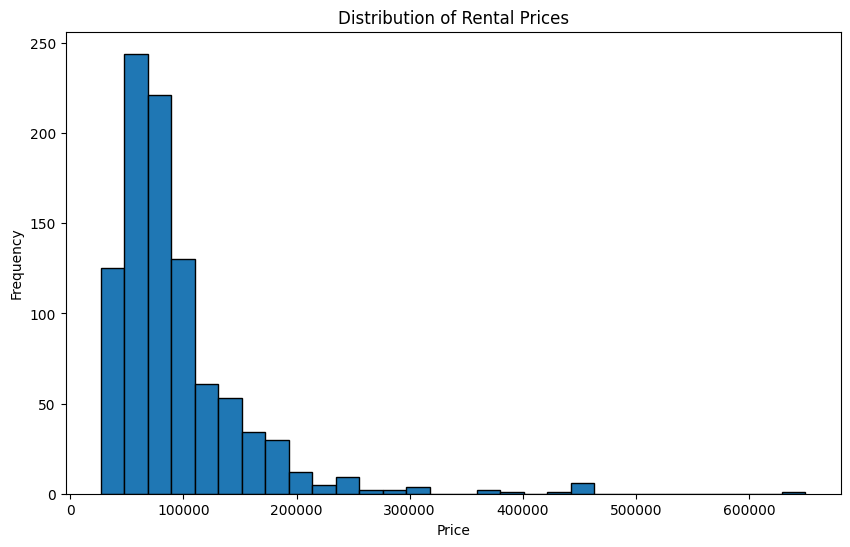

In [19]:



plt.figure(figsize=(10, 6))
plt.hist(df['price_numeric'], bins=30, edgecolor='black')
plt.title('Distribution of Rental Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


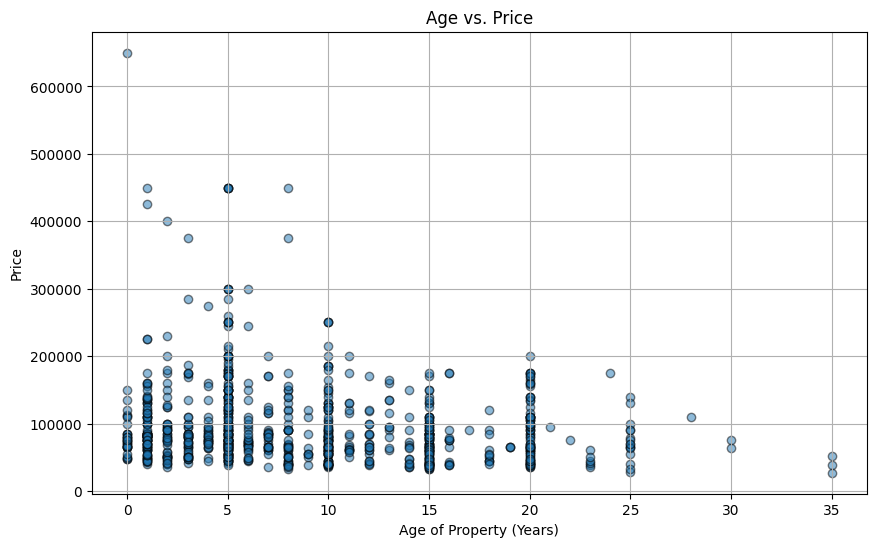

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age_numeric'], df['price_numeric'], alpha=0.5, edgecolor='k')
plt.title('Age vs. Price')
plt.xlabel('Age of Property (Years)')
plt.ylabel('Price')
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

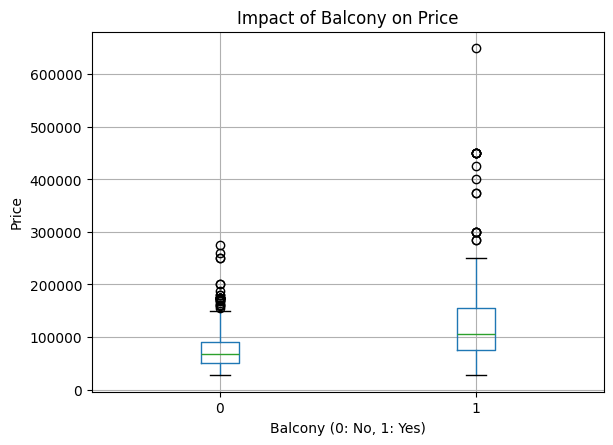

In [21]:
plt.figure(figsize=(10, 6))
df.boxplot(column='price_numeric', by='balcony_numeric')
plt.title('Impact of Balcony on Price')
plt.xlabel('Balcony (0: No, 1: Yes)')
plt.ylabel('Price')
plt.suptitle('')  # Remove automatic suptitle
plt.show()

In [5]:
le = LabelEncoder()
df['furnishing'] = le.fit_transform(df['furnishing'])
df['facing'] = le.fit_transform(df['facing'])


In [6]:
features = ['furnishing', 'bathrooms', 'facing', 'security_numeric', 'built_up_area_numeric_in_sq_ft', 'balcony_numeric', 'floor_number', 'total_floors', 'age_numeric']
X = df[features]
y = df['price_numeric']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [9]:
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")


Root Mean Squared Error: 26617.00605917223
R-squared Score: 0.8507032456190711


In [10]:
feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)


                          feature  importance
3                security_numeric    0.861713
4  built_up_area_numeric_in_sq_ft    0.060206
7                    total_floors    0.026393
8                     age_numeric    0.014000
1                       bathrooms    0.013463
6                    floor_number    0.011722
2                          facing    0.006749
0                      furnishing    0.003817
5                 balcony_numeric    0.001937


In [11]:
#inputing random values for each feature
random_input = {
    'furnishing': np.random.randint(0, 3),
    'bathrooms': np.random.randint(1, 5),
    'facing': np.random.randint(0, 4),
    'security_numeric': np.random.randint(0, 2),
    'built_up_area_numeric_in_sq_ft': np.random.randint(500, 3000),
    'balcony_numeric': np.random.randint(0, 3),
    'floor_number': np.random.randint(1, 20),
    'total_floors': np.random.randint(5, 30),
    'age_numeric': np.random.randint(0, 50)
}
input_array = np.array(list(random_input.values())).reshape(1, -1)
predicted_price = rf_model.predict(input_array)

print(f"Random Input: {random_input}")
print(f"Predicted House Price: {predicted_price[0]}")


Random Input: {'furnishing': 2, 'bathrooms': 2, 'facing': 3, 'security_numeric': 1, 'built_up_area_numeric_in_sq_ft': 2766, 'balcony_numeric': 2, 'floor_number': 3, 'total_floors': 26, 'age_numeric': 18}
Predicted House Price: 51208.33333333334


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [12]:
!git config --global user.email "hkangala@gmail.com"
!git config --global user.name "hrshx3o5o6"

In [13]:
!git init
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/hrshx3o5o6/mozilla-firefox-AIML.git
!git push -u origin main

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	dataset.csv
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/hrshx3o5o6/mozilla-firefox-AIML.git'


In [14]:
!git add .


In [15]:
!git commit -m "Initial Commit"

[main (root-commit) d44d0d9] Initial Commit
 22 files changed, 51969 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gce
 create mode 100644 .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
 create mode 100644 .config/logs/2025.02.27/14.21.12.928198.log
 create mode 100644 .config/logs/2025.02.27/14.21.34.075995.log
 create mode 100644 .config/logs/2025.02.27/14.21.43.047280.log
 create mode 100644 .config/logs/2025.02.27/14.21.44.229982.log
 create mode 100644 .config/logs/2025.02.27/14.21.53.145814.log
 create mode 100644 .config/logs/2025.02.27/14.21.53.908629.log
 create mode 100644 dataset.csv
 create mode 100755 sample_da

In [16]:
!git push -u origin main

fatal: could not read Username for 'https://github.com': No such device or address
